In [280]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Create a figure with a specific size

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [281]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.cluster import DBSCAN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, GroupKFold, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn import preprocessing 
from sklearn import tree 
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(rc={'figure.figsize':(16,12)})

# EDA

In [282]:
df_test = pd.read_csv('spaceship-titanic/test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [283]:
df_train = pd.read_csv('spaceship-titanic/train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Combining the 2 tables

In [284]:
df = pd.concat([df_train, df_test])
print(df_test.shape)
print(df_train.shape)

df

(4277, 13)
(8693, 14)


c:\Users\archi\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
c:\Users\archi\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


## Data Sets
1. train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
2. test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

## Data Explaination
1. PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
3. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. Destination - The planet the passenger will be debarking to.
6. Age - The age of the passenger.
7. VIP - Whether the passenger has paid for special VIP service during the voyage.
8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
9. Name - The first and last names of the passenger.
10. Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Getting Basic Info Of Data Sets

We will need to do the Following operations first:
1. Split Passenger Id into Group ID, Passenger ID
2. Split Cabin into Deck, Number, Side

In [285]:
df[['group', 'passenger_number']] = df['PassengerId'].str.split('_', expand=True)
df[['PassengerId','group', 'passenger_number']].head()

,PassengerId,group,passenger_number
0,0001_01,0001,01
1,0002_01,0002,01
2,0003_01,0003,01
3,0003_02,0003,02
4,0004_01,0004,01


In [286]:
df[['Deck', 'Num','Side']] = df['Cabin'].str.split('/', expand=True)
df[['Cabin','Deck', 'Num','Side']].head()

,Cabin,Deck,Num,Side
0,B/0/P,B,0,P
1,F/0/S,F,0,S
2,A/0/S,A,0,S
3,A/0/S,A,0,S
4,F/1/S,F,1,S


## Removing Data That Definatly Will Not Contrubute To The Model.

In [287]:
df = df.drop(columns=['Name', 'PassengerId','passenger_number','Cabin'])
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,F,1,S


## Encoding Columns

In [288]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,F,1,S


In [289]:
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'HomePlanet'. 
df['HomePlanet']= label_encoder.fit_transform(df['HomePlanet']) 
# Encode labels in column 'Destination'. 
df['Destination']= label_encoder.fit_transform(df['Destination'])

# Encode labels in column 'VIP'. 
df['VIP']= label_encoder.fit_transform(df['VIP']) 

# Encode labels in column 'CryoSleep'. 
df['CryoSleep']= label_encoder.fit_transform(df['CryoSleep']) 

# Encode labels in column 'group'. 
df['group']= label_encoder.fit_transform(df['group']) 

# Encode labels in column 'Deck'. 
df['Deck']= label_encoder.fit_transform(df['Deck']) 

# Encode labels in column 'Side'. 
df['Side']= label_encoder.fit_transform(df['Side']) 

In [290]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,3,5,1,1


## Replacing Missing Values

In [291]:
df.isnull().sum().sort_values(ascending=False)

Transported     4277
ShoppingMall     306
Num              299
FoodCourt        289
Spa              284
Age              270
VRDeck           268
RoomService      263
HomePlanet         0
CryoSleep          0
Destination        0
VIP                0
group              0
Deck               0
Side               0
dtype: int64

In [292]:
values = {
    "Age": 0,
    "CryoSleep": 0,
    "ShoppingMall": 0,
    'VIP' : 0,
    'VRDeck' : 0,
    'FoodCourt' : 0,
    'Spa': 0,
    'RoomService' : 0,
    'HomePlanet' : 'Unknown',
    'Destination' : 'Unknown',
    'Deck' : df['Deck'].mode()[0],
    'Num' : 0,
    'Side' : df['Side'].mode()[0],

    }


df = df.fillna(value=values)
df.isnull().sum().sort_values(ascending=False)

Transported     4277
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
group              0
Deck               0
Num                0
Side               0
dtype: int64

## We need to convert the data types of some columns
1. Age
2. Num
3. Transported

In [293]:
df.Age= df.Age.astype('float64')
df.Num= df.Num.astype('float64')
df.Transported= df.Transported.astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  int32  
 1   CryoSleep     12970 non-null  int32  
 2   Destination   12970 non-null  int32  
 3   Age           12970 non-null  float64
 4   VIP           12970 non-null  int32  
 5   RoomService   12970 non-null  float64
 6   FoodCourt     12970 non-null  float64
 7   ShoppingMall  12970 non-null  float64
 8   Spa           12970 non-null  float64
 9   VRDeck        12970 non-null  float64
 10  Transported   8693 non-null   float64
 11  group         12970 non-null  int32  
 12  Deck          12970 non-null  int32  
 13  Num           12970 non-null  float64
 14  Side          12970 non-null  int32  
dtypes: float64(8), int32(7)
memory usage: 1.2 MB


In [294]:
df.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,Deck,Num,Side
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,8693.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,0.722051,0.401002,1.522591,28.173015,0.066692,218.378026,441.890979,170.779491,301.722282,300.450270,0.503624,4634.337471,4.406091,589.686970,0.538088
std,0.864789,0.536679,0.836088,14.817542,0.328476,641.766201,1568.038076,584.153630,1118.746785,1168.655639,0.500016,2685.904299,1.824435,514.975174,0.542843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2305.250000,3.000000,156.000000,0.000000
50%,0.000000,0.000000,2.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4631.000000,5.000000,409.000000,1.000000
75%,1.000000,1.000000,2.000000,37.000000,0.000000,42.750000,62.750000,23.000000,50.000000,36.000000,1.000000,6923.750000,6.000000,992.000000,1.000000
max,3.000000,2.000000,3.000000,79.000000,2.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,9279.000000,8.000000,1894.000000,2.000000


## Splitiing df into Train and Test

In [295]:
df_train = df[df['Transported'].notnull()]
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1.0,1,5,0.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,2,0,0.0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,2,0,0.0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,3,5,1.0,1


In [296]:
df_test = df[df['Transported'].isnull()]
df_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,Deck,Num,Side
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,NaN,12,6,3.0,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,NaN,17,5,4.0,1
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,NaN,18,2,0.0,1
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,NaN,20,2,1.0,1
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,NaN,22,5,5.0,1


## Data Visualization

<Axes: >

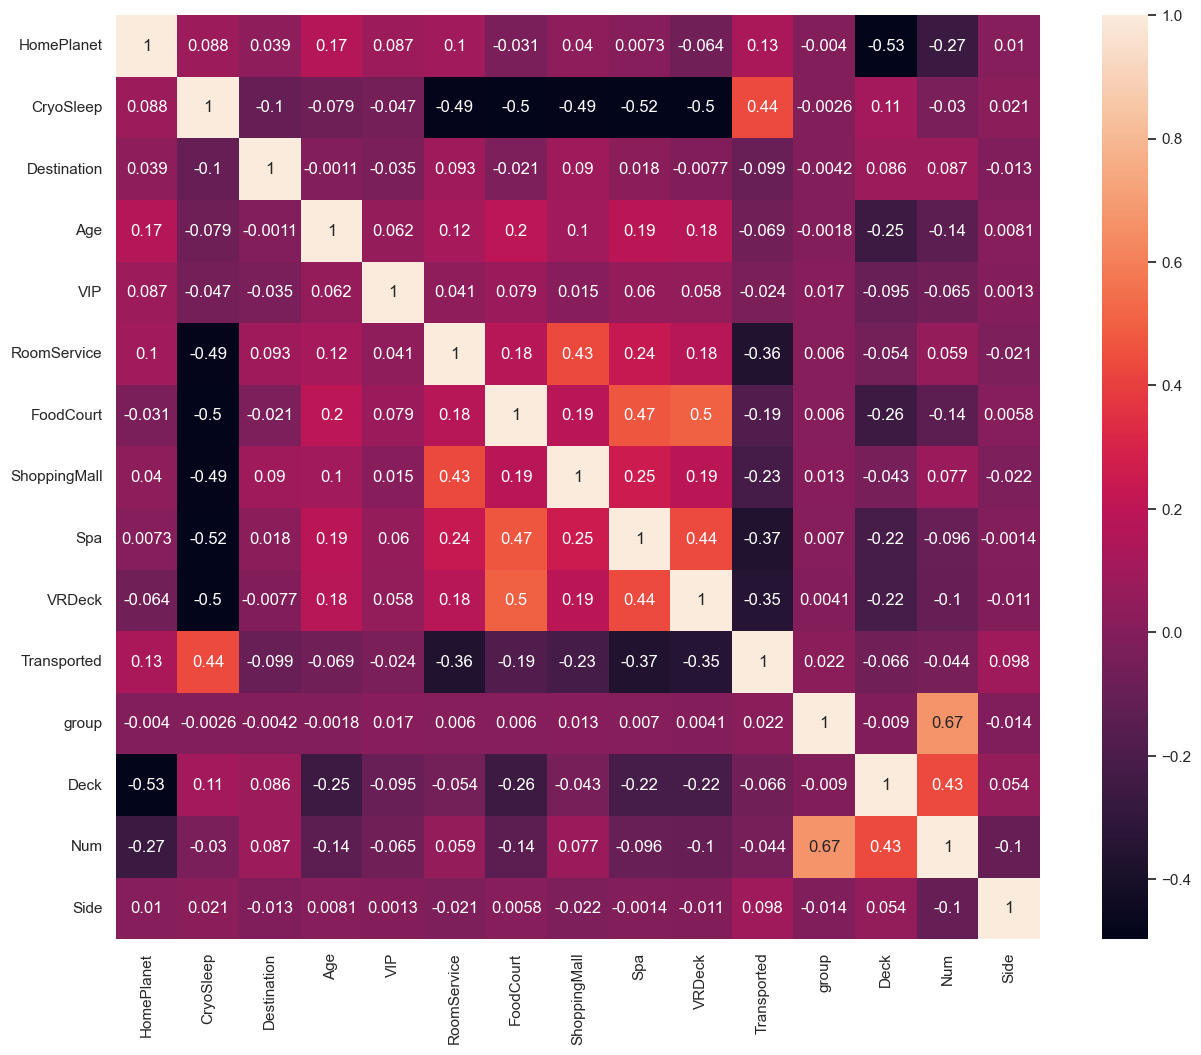

In [297]:
sns.heatmap(df_train.corr(method='spearman'), annot=True, square=True, robust=True) 

Observations of Correlations:
1. Transported <-> Cryosleep,Side,HomePlanet
2. Home planet <-> Deck, Num <-> Group
3. Cryosleep <-> Roomservice, Foodcourt, ShoppingMall, Spa, VRDeck

# Model Testing

## Spliting Dataset to train, validate and test

In [298]:
#df_train = df_train[['CryoSleep','Side','HomePlanet','Deck','Num','group','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported']]
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1.0,1,5,0.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,2,0,0.0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,2,0,0.0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,3,5,1.0,1


In [299]:
X = df_train.drop('Transported',axis=1)
y = df_train['Transported']

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Initialize Table of Model Performances

In [301]:
model_metrics = pd.DataFrame(columns=['model','accuracy_score','precision_score','recall_score','f1_score'])

## Tree

### Descision Tree

In [302]:
if False:
        DTC_tree = DecisionTreeClassifier()
        params={
                'criterion':['gini', 'entropy', 'log_loss'],
                'splitter': ['best', 'random'],
                'max_depth': [None,5,10,50,100,150, 200],
                'min_samples_split': [2],
                'min_samples_leaf': [1],
                'min_weight_fraction_leaf':[0],
                'max_features': ['sqrt', 'log2'],
                'random_state': [42],
                }
        gs=GridSearchCV(estimator=DTC_tree, param_grid=params, cv=None) 
        gs = gs.fit(X, y)
        best_params=gs.best_params_ 
        accuracy=gs.best_score_ 
        print('best_params:','\n',best_params)
        print('accuracy:','\n',accuracy)


In [303]:
DTC_tree = DecisionTreeClassifier()

DTC_tree.fit(X_train,y_train)
predicted_value = DTC_tree.predict(X_test)
#tree.plot_tree(DTC_tree)

model_metrics.loc[len(model_metrics.index)] = ['Descision Tree', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value)]  



### Extra Tree Classifier

In [304]:
if False:
        ETC_tree = ExtraTreeClassifier()
        params={
                'criterion':['gini', 'entropy', 'log_loss'],
                'splitter': ['best', 'random'],
                'max_depth': [None,5,10,50,100,150, 200],
                'min_samples_split': [2],
                'min_samples_leaf': [1],
                'min_weight_fraction_leaf':[0],
                'max_features': ['sqrt', 'log2'],
                'random_state': [42],
                }
        gs=GridSearchCV(estimator=ETC_tree, param_grid=params, cv=None) 
        gs = gs.fit(X, y)
        best_params=gs.best_params_ 
        accuracy=gs.best_score_ 
        print('best_params:','\n',best_params)
        print('accuracy:','\n',accuracy)


In [305]:
ETC_tree = ExtraTreeClassifier()
ETC_tree.fit(X_train,y_train)
predicted_value = ETC_tree.predict(X_test)
model_metrics.loc[len(model_metrics.index)] = ['Extra Tree Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value)]  


## Neighbours

### KNeighborsClassifier

In [306]:
if False:        
        KNC = KNeighborsClassifier()
        params={
                'n_neighbors': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91,101],
                'weights': ['uniform', 'distance'], 
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                }
        gs=GridSearchCV(estimator=KNC, param_grid=params, cv=None) 
        gs = gs.fit(X, y)
        best_params=gs.best_params_ 
        accuracy=gs.best_score_ 
        print('best_params:','\n',best_params)
        print('accuracy:','\n',accuracy)


In [307]:
KNC = KNeighborsClassifier()
KNC.fit(X_train,y_train)
predicted_value = KNC.predict(X_test)
model_metrics.loc[len(model_metrics.index)] = ['K Neighbours Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value)]  


## Naive Bayes

### BernoulliNB

In [308]:
BNB = BernoulliNB()
BNB.fit(X_train,y_train)
predicted_value = BNB.predict(X_test)
model_metrics.loc[len(model_metrics.index)] = ['Naive Bayes', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value)]  


## Bagging Classifier

In [309]:
if False:
    acc_all = []
    for n in range(50,500,50):
        BClassifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=n)
        BClassifier.fit(X_train,y_train)
        predicted_value = BClassifier.predict(X_test)
        acc_all.append(accuracy_score(y_test, predicted_value))
        print(n,'\t:\t',acc_all[-1])
    print("Best Performing N Estimator")
    print("N\t:\tAcc")
    print(list(range(50,500,50))[acc_all.index(max(acc_all))],'\t:\t',max(acc_all))

In [310]:
dts = DecisionTreeClassifier(**{
    'criterion': 'entropy',
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0,
    'random_state': 42,
    'splitter': 'best'
    })
BClassifier = BaggingClassifier(estimator=dts, n_estimators=450)
BClassifier.fit(X_train,y_train)
predicted_value = BClassifier.predict(X_test)
model_metrics.loc[len(model_metrics.index)] = ['Bagging Descision Tree Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value)]  


In [311]:
ETC_tree = ExtraTreeClassifier(**{
    'criterion': 'entropy',
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0,
    'random_state': 42,
    'splitter': 'best'
 })
BClassifier = BaggingClassifier(estimator=ETC_tree, n_estimators=450)
BClassifier.fit(X_train,y_train)
predicted_value = BClassifier.predict(X_test)
model_metrics.loc[len(model_metrics.index)] = ['Bagging Extra Tree Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value)]  


## Boosting

### Gradient Bosting

In [312]:
if False:        
        GBoosting = GradientBoostingClassifier()
        params={
                'n_estimators': [100, 200, 300, 400, 500, 600],
                'learning_rate': [0.05, 0.1], 
                'max_depth': [1, 2, 3, 4, 5], 
                'random_state' : [42]
                }
        gs=GridSearchCV(estimator=GBoosting, param_grid=params, cv=None) 
        gs = gs.fit(X, y)
        best_params=gs.best_params_ 
        accuracy=gs.best_score_ 
        print( 'best_params:','\n',best_params)
        print('accuracy:','\n',accuracy)


In [313]:
GBoosting = GradientBoostingClassifier()
GBoosting.fit(X_train,y_train)
predicted_value = GBoosting.predict(X_test)
model_metrics.loc[len(model_metrics.index)] = ['Gradient Boosting', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value)]  


### AdaBoostClassifier

In [314]:
if False:        
        Ada = AdaBoostClassifier()
        params={
                'n_estimators': [100, 200, 300, 400, 500, 600],
                'learning_rate': [0.05, 0.1],
                'random_state' : [42]
                }
        gs=GridSearchCV(estimator=Ada, param_grid=params, cv=None) 
        gs = gs.fit(X, y)
        best_params=gs.best_params_ 
        accuracy=gs.best_score_ 
        print( 'best_params:','\n',best_params)
        print('accuracy:','\n',accuracy)


In [315]:
Ada = AdaBoostClassifier()
Ada.fit(X_train,y_train)
predicted_value = Ada.predict(X_test)
model_metrics.loc[len(model_metrics.index)] = ['Ada Boosting', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value)]  


### XGBClassifier

In [316]:
if False:        
        xgb = XGBClassifier()
        params={
                'booster':['gbtree'],
                'lambda' : [0, 0.5, 1],
                'alpha' : [0, 0.5, 1],
                'random_state' : [42]
                }
        gs=GridSearchCV(estimator=xgb, param_grid=params, cv=None) 
        gs = gs.fit(X, y)
        best_params=gs.best_params_ 
        accuracy=gs.best_score_ 
        print( 'best_params:','\n',best_params)
        print('accuracy:','\n',accuracy)


In [317]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
predicted_value = xgb.predict(X_test)
model_metrics.loc[len(model_metrics.index)] = ['XGBoost Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value)]  


## LGBM Classifier

In [318]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
predicted_value = lgbm.predict(X_test)
model_metrics.loc[len(model_metrics.index)] = ['LGBM Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value)]  


[LightGBM] [Info] Number of positive: 2933, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1889
[LightGBM] [Info] Number of data points in the train set: 5824, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503606 -> initscore=0.014423
[LightGBM] [Info] Start training from score 0.014423


## CatBoost Classifier

In [319]:
cat  = CatBoostClassifier()
cat.fit(X_train,y_train)
predicted_value = cat.predict(X_test)
model_metrics.loc[len(model_metrics.index)] = ['CatBoost Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value)]  


Learning rate set to 0.021862
0:	learn: 0.6834738	total: 4.36ms	remaining: 4.36s
1:	learn: 0.6750715	total: 7.81ms	remaining: 3.9s
2:	learn: 0.6656333	total: 11ms	remaining: 3.67s
3:	learn: 0.6558218	total: 14.4ms	remaining: 3.59s
4:	learn: 0.6482440	total: 17.9ms	remaining: 3.57s
5:	learn: 0.6389649	total: 21.3ms	remaining: 3.53s
6:	learn: 0.6307564	total: 24.8ms	remaining: 3.52s
7:	learn: 0.6222735	total: 28ms	remaining: 3.48s
8:	learn: 0.6157368	total: 31.9ms	remaining: 3.52s
9:	learn: 0.6087645	total: 35.2ms	remaining: 3.48s
10:	learn: 0.6013613	total: 38.8ms	remaining: 3.49s


11:	learn: 0.5946247	total: 42.6ms	remaining: 3.51s
12:	learn: 0.5889986	total: 47.4ms	remaining: 3.6s
13:	learn: 0.5826009	total: 51.3ms	remaining: 3.61s
14:	learn: 0.5765105	total: 54.8ms	remaining: 3.6s
15:	learn: 0.5710681	total: 58.7ms	remaining: 3.61s
16:	learn: 0.5654623	total: 61.9ms	remaining: 3.58s
17:	learn: 0.5610679	total: 66.6ms	remaining: 3.63s
18:	learn: 0.5555648	total: 70ms	remaining: 3.62s
19:	learn: 0.5525695	total: 73.7ms	remaining: 3.61s
20:	learn: 0.5478007	total: 77ms	remaining: 3.59s
21:	learn: 0.5445338	total: 81.2ms	remaining: 3.61s
22:	learn: 0.5399951	total: 84.9ms	remaining: 3.61s
23:	learn: 0.5361356	total: 88.1ms	remaining: 3.58s
24:	learn: 0.5337588	total: 91.9ms	remaining: 3.58s
25:	learn: 0.5298068	total: 95.1ms	remaining: 3.56s
26:	learn: 0.5271554	total: 99.1ms	remaining: 3.57s
27:	learn: 0.5243072	total: 102ms	remaining: 3.55s
28:	learn: 0.5212841	total: 106ms	remaining: 3.54s
29:	learn: 0.5186476	total: 109ms	remaining: 3.51s
30:	learn: 0.5156618	

# Observations

In [320]:
model_metrics.sort_values(by=['accuracy_score'],ascending=False)

,model,accuracy_score,precision_score,recall_score,f1_score
9,LGBM Classifier,0.807250,0.803401,0.817301,0.810292
10,CatBoost Classifier,0.802370,0.791114,0.825606,0.807992
5,Bagging Extra Tree Classifier,0.796793,0.782438,0.826298,0.803770
4,Bagging Descision Tree Classifier,0.796445,0.781925,0.826298,0.803499
8,XGBoost Classifier,0.794353,0.794219,0.798616,0.796411
6,Gradient Boosting,0.792959,0.765771,0.848443,0.804990
7,Ada Boosting,0.779714,0.760077,0.822145,0.789894
2,K Neighbours Classifier,0.758452,0.743523,0.794464,0.768150
0,Descision Tree,0.750784,0.744311,0.769550,0.756720
3,Naive Bayes,0.737191,0.767622,0.685813,0.724415


#### The following models show good preformance
1. CatBoost Classifier	
2. LGBM Classifier
3. Bagging Descision Tree Classifier
4. Gradient Boosting
5. XGBoost Classifier

# Implimenting Ensemble Methods

## Stacking Classifier

In [321]:
base_models = [
    ('catboost', CatBoostClassifier()),
    ('lightgbm', LGBMClassifier()),
    ('gbdt', GradientBoostingClassifier()),
    ('bdtc',BaggingClassifier(estimator=dts, n_estimators=450)),
    ('xgboost', XGBClassifier())
]
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
predicted_value = stacking_clf.predict(X_test)
model_metrics.loc[len(model_metrics.index)] = ['Stacking Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value)]  
model_metrics.sort_values(by=['accuracy_score'],ascending=False)

Learning rate set to 0.021862
0:	learn: 0.6834738	total: 4.89ms	remaining: 4.88s
1:	learn: 0.6750715	total: 7.91ms	remaining: 3.95s
2:	learn: 0.6656333	total: 11.6ms	remaining: 3.87s
3:	learn: 0.6558218	total: 16.2ms	remaining: 4.03s
4:	learn: 0.6482440	total: 19.5ms	remaining: 3.89s
5:	learn: 0.6389649	total: 23.4ms	remaining: 3.88s
6:	learn: 0.6307564	total: 26.8ms	remaining: 3.8s
7:	learn: 0.6222735	total: 31.2ms	remaining: 3.87s
8:	learn: 0.6157368	total: 35.1ms	remaining: 3.86s
9:	learn: 0.6087645	total: 39.2ms	remaining: 3.88s


10:	learn: 0.6013613	total: 44.1ms	remaining: 3.96s
11:	learn: 0.5946247	total: 48.4ms	remaining: 3.98s
12:	learn: 0.5889986	total: 51.7ms	remaining: 3.93s
13:	learn: 0.5826009	total: 55.8ms	remaining: 3.93s
14:	learn: 0.5765105	total: 59.3ms	remaining: 3.9s
15:	learn: 0.5710681	total: 63.4ms	remaining: 3.9s
16:	learn: 0.5654623	total: 67.3ms	remaining: 3.89s
17:	learn: 0.5610679	total: 71.1ms	remaining: 3.88s
18:	learn: 0.5555648	total: 76ms	remaining: 3.92s
19:	learn: 0.5525695	total: 79.7ms	remaining: 3.91s
20:	learn: 0.5478007	total: 84.3ms	remaining: 3.93s
21:	learn: 0.5445338	total: 88.1ms	remaining: 3.91s
22:	learn: 0.5399951	total: 91.8ms	remaining: 3.9s
23:	learn: 0.5361356	total: 95.8ms	remaining: 3.89s
24:	learn: 0.5337588	total: 99.4ms	remaining: 3.88s
25:	learn: 0.5298068	total: 103ms	remaining: 3.87s
26:	learn: 0.5271554	total: 107ms	remaining: 3.86s
27:	learn: 0.5243072	total: 111ms	remaining: 3.84s
28:	learn: 0.5212841	total: 114ms	remaining: 3.81s
29:	learn: 0.5186476	

,model,accuracy_score,precision_score,recall_score,f1_score
9,LGBM Classifier,0.807250,0.803401,0.817301,0.810292
11,Stacking Classifier,0.804810,0.787151,0.839446,0.812458
10,CatBoost Classifier,0.802370,0.791114,0.825606,0.807992
5,Bagging Extra Tree Classifier,0.796793,0.782438,0.826298,0.803770
4,Bagging Descision Tree Classifier,0.796445,0.781925,0.826298,0.803499
8,XGBoost Classifier,0.794353,0.794219,0.798616,0.796411
6,Gradient Boosting,0.792959,0.765771,0.848443,0.804990
7,Ada Boosting,0.779714,0.760077,0.822145,0.789894
2,K Neighbours Classifier,0.758452,0.743523,0.794464,0.768150
0,Descision Tree,0.750784,0.744311,0.769550,0.756720


## Voting Classifier

In [322]:

catboost = CatBoostClassifier()
lightgbm = LGBMClassifier()
gbdt = GradientBoostingClassifier()
bdtc = BaggingClassifier(estimator=dts, n_estimators=450)
xgboost = XGBClassifier()

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('catboost',catboost),('lightgbm',lightgbm),('gbdt',gbdt),('bdtc',bdtc),('xgboost',xgboost)],
    voting='soft'  # Can be changed to 'soft' if desired
)

# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)
predicted_value = voting_clf.predict(X_test)
model_metrics.loc[len(model_metrics.index)] = ['Voting Classifier', accuracy_score(y_test, predicted_value), precision_score(y_test, predicted_value),recall_score(y_test, predicted_value),f1_score(y_test, predicted_value)]  
model_metrics.sort_values(by=['accuracy_score'],ascending=False)

Learning rate set to 0.021862
0:	learn: 0.6834738	total: 3.32ms	remaining: 3.31s
1:	learn: 0.6750715	total: 6.14ms	remaining: 3.06s
2:	learn: 0.6656333	total: 9.31ms	remaining: 3.1s
3:	learn: 0.6558218	total: 13.2ms	remaining: 3.29s
4:	learn: 0.6482440	total: 16.8ms	remaining: 3.35s
5:	learn: 0.6389649	total: 20.6ms	remaining: 3.42s
6:	learn: 0.6307564	total: 24.1ms	remaining: 3.42s
7:	learn: 0.6222735	total: 27.6ms	remaining: 3.42s
8:	learn: 0.6157368	total: 32.1ms	remaining: 3.54s
9:	learn: 0.6087645	total: 36.4ms	remaining: 3.61s
10:	learn: 0.6013613	total: 40.5ms	remaining: 3.64s
11:	learn: 0.5946247	total: 45.1ms	remaining: 3.72s
12:	learn: 0.5889986	total: 49.1ms	remaining: 3.73s
13:	learn: 0.5826009	total: 54.1ms	remaining: 3.81s
14:	learn: 0.5765105	total: 58.1ms	remaining: 3.82s
15:	learn: 0.5710681	total: 61.7ms	remaining: 3.79s
16:	learn: 0.5654623	total: 65.4ms	remaining: 3.78s
17:	learn: 0.5610679	total: 69.2ms	remaining: 3.77s
18:	learn: 0.5555648	total: 73ms	remaining: 3

,model,accuracy_score,precision_score,recall_score,f1_score
9,LGBM Classifier,0.807250,0.803401,0.817301,0.810292
11,Stacking Classifier,0.804810,0.787151,0.839446,0.812458
10,CatBoost Classifier,0.802370,0.791114,0.825606,0.807992
12,Voting Classifier,0.801673,0.791611,0.822837,0.806922
5,Bagging Extra Tree Classifier,0.796793,0.782438,0.826298,0.803770
4,Bagging Descision Tree Classifier,0.796445,0.781925,0.826298,0.803499
8,XGBoost Classifier,0.794353,0.794219,0.798616,0.796411
6,Gradient Boosting,0.792959,0.765771,0.848443,0.804990
7,Ada Boosting,0.779714,0.760077,0.822145,0.789894
2,K Neighbours Classifier,0.758452,0.743523,0.794464,0.768150


# Final Model Selection : LGBM Classifier
## Printing and saving output

In [323]:
df_test = df_test[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'group', 'Deck', 'Num',
       'Side']]
df_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,Deck,Num,Side
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,12,6,3.0,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,17,5,4.0,1
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,18,2,0.0,1
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,20,2,1.0,1
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,22,5,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.0,0,0.0,0.0,0.0,0.0,0.0,9265,6,1496.0,1
4273,0,0,2,42.0,0,0.0,847.0,17.0,10.0,144.0,9268,8,0.0,2
4274,2,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,9270,3,296.0,0
4275,1,0,3,0.0,0,0.0,2680.0,0.0,0.0,523.0,9272,3,297.0,0


In [327]:
final = pd.DataFrame()
temp = pd.read_csv('spaceship-titanic/test.csv')
final.index = temp.index
final['PassengerId'] = temp['PassengerId']

predicted_value = lgbm.predict(df_test)
final['Transported'] = predicted_value
final['Transported'].replace(0, False, inplace=True)
final['Transported'].replace(1, True, inplace=True)
final.to_csv('submission.csv', index=False)
final.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
